In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv('../../dataset/cleaned_bank.csv')

C:\Users\josia\AppData\Local\Temp\ipykernel_12588\3141102053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='y', palette='pastel')


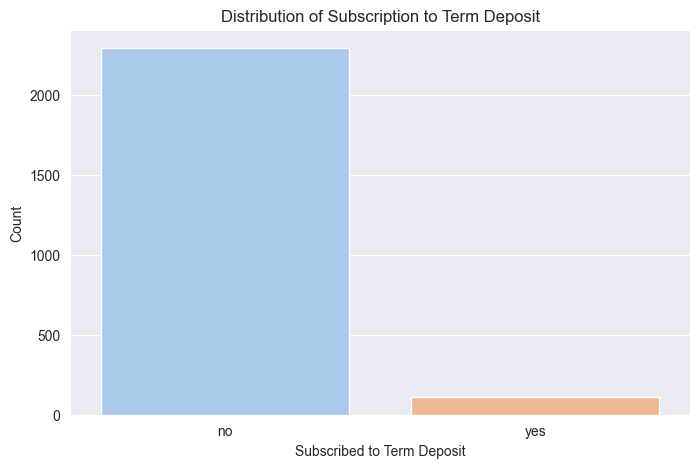

In [2]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='y', palette='pastel')
plt.title('Distribution of Subscription to Term Deposit')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()


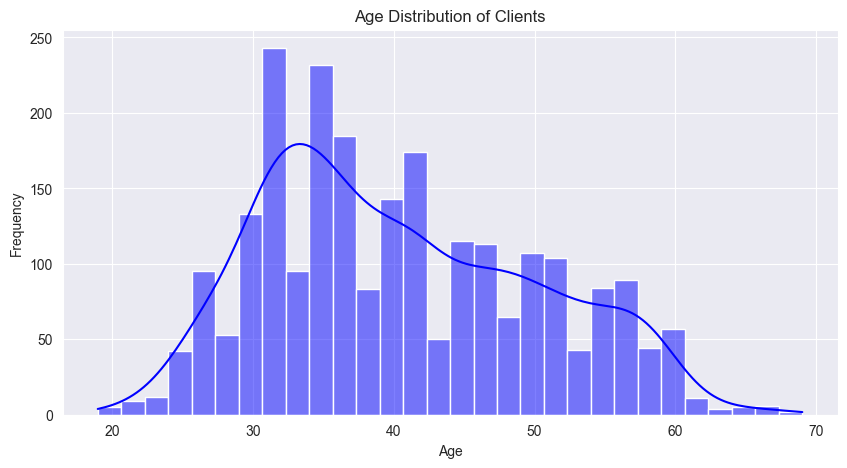

In [3]:
plt.figure(figsize=(10, 5))
sns.histplot(data['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


C:\Users\josia\AppData\Local\Temp\ipykernel_12588\818400739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='job', order=data['job'].value_counts().index, palette='viridis')


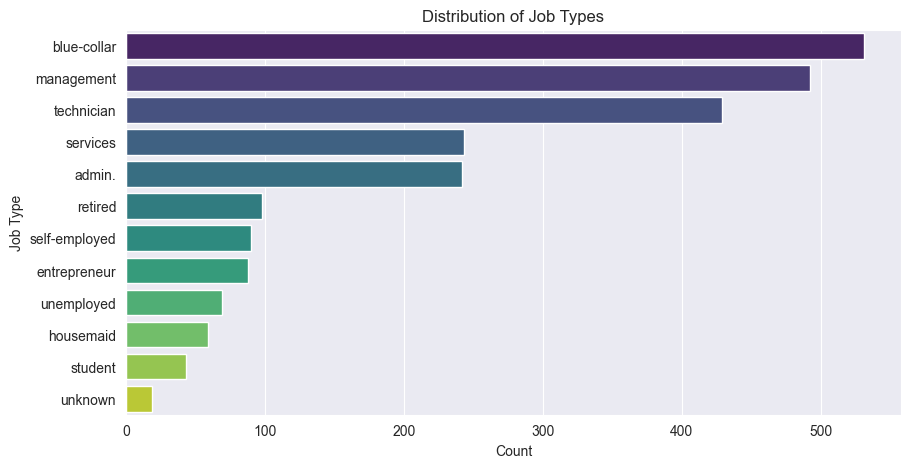

In [4]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, y='job', order=data['job'].value_counts().index, palette='viridis')
plt.title('Distribution of Job Types')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()


C:\Users\josia\AppData\Local\Temp\ipykernel_12588\3144031485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='y', y='balance', palette='pastel')


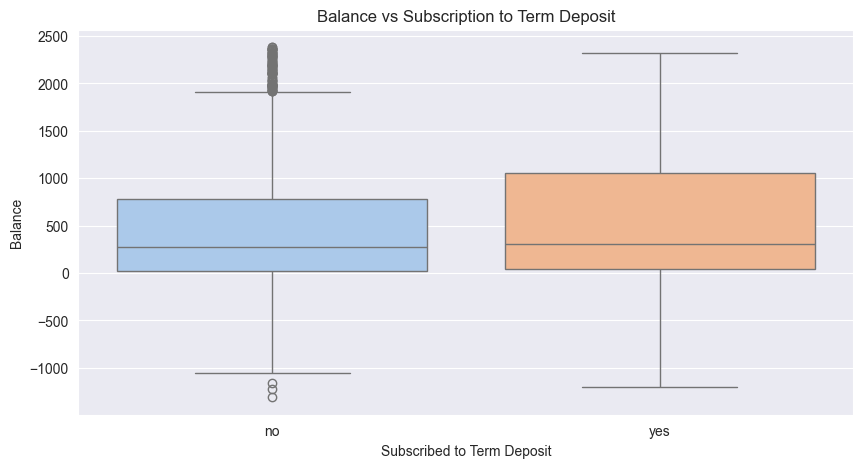

In [5]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='y', y='balance', palette='pastel')
plt.title('Balance vs Subscription to Term Deposit')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Balance')
plt.show()


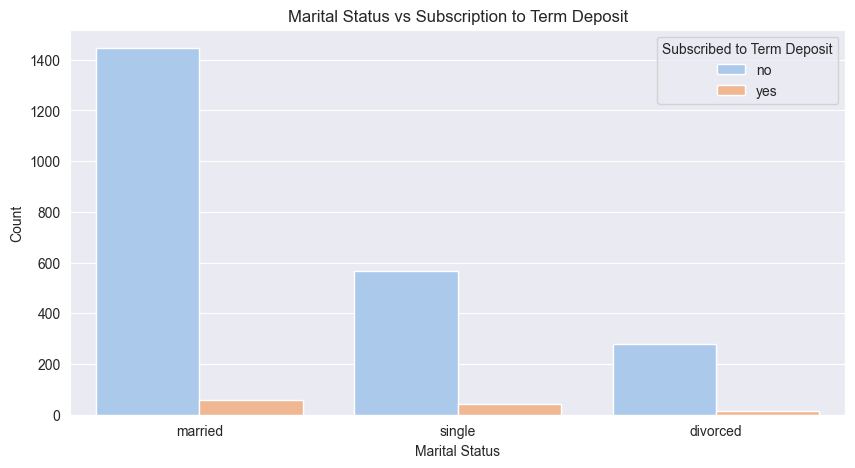

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='marital', hue='y', palette='pastel')
plt.title('Marital Status vs Subscription to Term Deposit')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed to Term Deposit', loc='upper right')
plt.show()


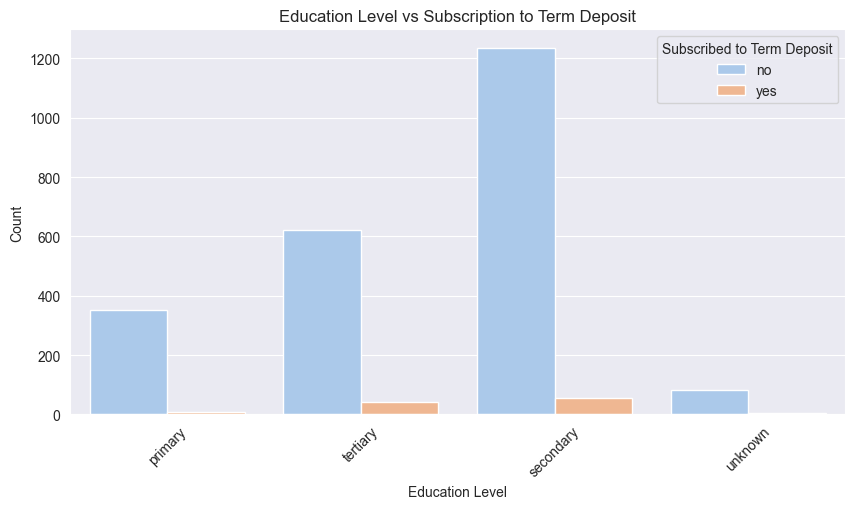

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='education', hue='y', palette='pastel')
plt.title('Education Level vs Subscription to Term Deposit')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed to Term Deposit', loc='upper right')
plt.show()


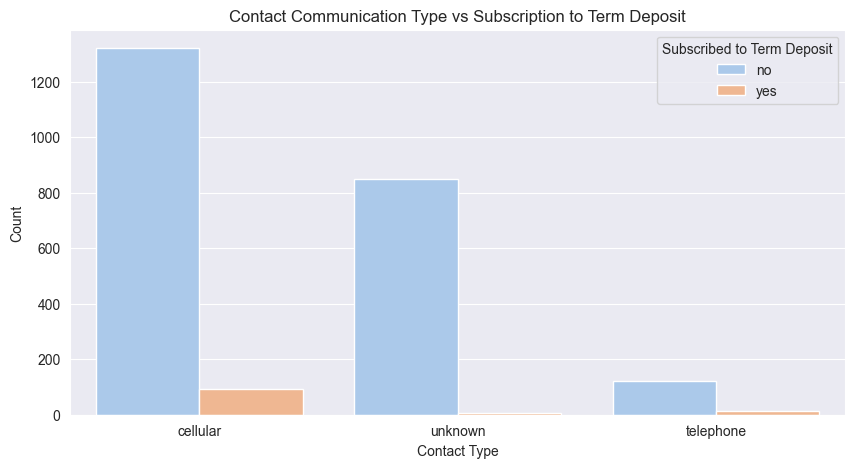

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='contact', hue='y', palette='pastel')
plt.title('Contact Communication Type vs Subscription to Term Deposit')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.legend(title='Subscribed to Term Deposit', loc='upper right')
plt.show()

C:\Users\josia\AppData\Local\Temp\ipykernel_12588\2453746444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='y', y='campaign', palette='pastel')


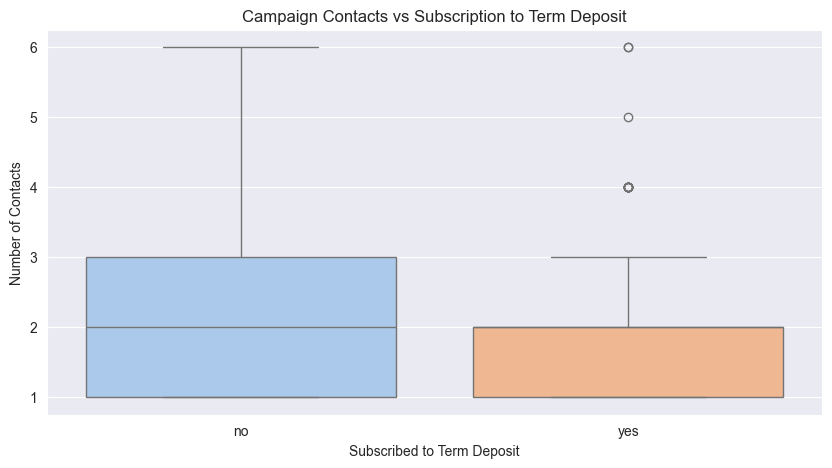

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='y', y='campaign', palette='pastel')
plt.title('Campaign Contacts vs Subscription to Term Deposit')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Number of Contacts')
plt.show()


In [12]:
from scipy import stats

# Separate balance values based on subscription status
subscribed = data[data['y'] == 'yes']['balance']
not_subscribed = data[data['y'] == 'no']['balance']

# Perform a T-test
t_statistic, p_value = stats.ttest_ind(subscribed, not_subscribed)

print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in balance.")
else:
    print("Fail to reject the null hypothesis: No significant difference in balance.")


T-Test Results:
T-statistic: 1.899316978925731
P-value: 0.05764255489842266
Fail to reject the null hypothesis: No significant difference in balance.


In [13]:
# Create a contingency table
contingency_table = pd.crosstab(data['job'], data['y'])

# Perform Chi-Squared test
chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-Squared Test Results:")
print("Chi2 statistic:", chi2_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: Job type affects subscription rates.")
else:
    print("Fail to reject the null hypothesis: Job type does not affect subscription rates.")


Chi-Squared Test Results:
Chi2 statistic: 28.76871881300446
P-value: 0.0024651927072473208
Reject the null hypothesis: Job type affects subscription rates.


In [14]:
# Convert 'y' to binary
data['y_binary'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(data['balance'], data['y_binary'])

print("Correlation Test Results:")
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: There is a correlation between balance and subscription.")
else:
    print("Fail to reject the null hypothesis: No correlation between balance and subscription.")


Correlation Test Results:
Correlation coefficient: 0.038732484926778186
P-value: 0.05764255489842167
Fail to reject the null hypothesis: No correlation between balance and subscription.


In [15]:


# Step 1: Define a mapping for job income categories
income_categories = {
    'management': 'High-Income',
    'entrepreneur': 'High-Income',
    'self-employed': 'High-Income',
    'technician': 'High-Income',
    'blue-collar': 'High-Income',
    'admin.': 'Low-Income',
    'services': 'Low-Income',
    'student': 'Low-Income',
    'retired': 'Low-Income',
    'housemaid': 'Low-Income',
    'unemployed': 'Low-Income',
    'unknown': 'Low-Income'
}

# Step 2: Create a new feature 'job_income_category'
data['job_income_category'] = data['job'].map(income_categories)

# Step 3: Create interaction features
# Interaction between job income category and balance
data['income_balance_interaction'] = data['job_income_category'].map({'High-Income': 1, 'Low-Income': 0}) * data['balance']

# Interaction between job income category and age
data['income_age_interaction'] = data['job_income_category'].map({'High-Income': 1, 'Low-Income': 0}) * data['age']

# Step 4: Optionally, check the new features
print(data[['job', 'job_income_category', 'balance', 'age',
            'income_balance_interaction', 'income_age_interaction']].head())


            job job_income_category  balance  age  income_balance_interaction  \
0    unemployed          Low-Income   1787.0   30                         0.0   
1    management         High-Income   1476.0   30                      1476.0   
2   blue-collar         High-Income      0.0   59                         0.0   
3    technician         High-Income    147.0   39                       147.0   
4  entrepreneur         High-Income    221.0   41                       221.0   

   income_age_interaction  
0                       0  
1                      30  
2                      59  
3                      39  
4                      41  


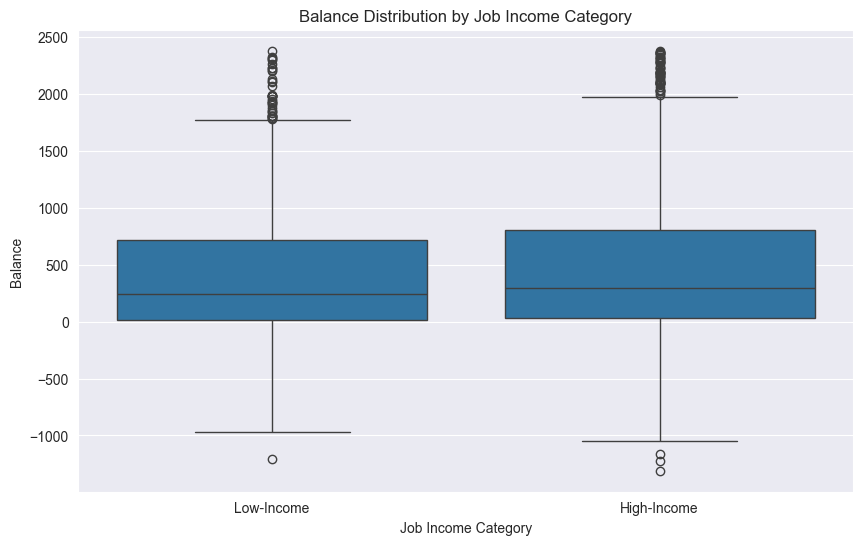

In [16]:
# Box plot to visualize balance by job income category
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_income_category', y='balance', data=data)
plt.title('Balance Distribution by Job Income Category')
plt.xlabel('Job Income Category')
plt.ylabel('Balance')
plt.show()